# Resolución de Ecuaciones Diferenciales Ordinarias

In [6]:
import numpy as np

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

Para integrar EDOs vamos a usar la función `odeint` del paquete `integrate`, que permite integrar sistemas del tipo:

$$ \frac{d\mathbf{y}}{dt}=\mathbf{f}\left(t, \mathbf{y}\right)$$

con condiciones iniciales $\mathbf{y}(\mathbf{0}) = \mathbf{y_0}$.

<div class="alert alert-danger"><b>Nota</b>: La función del sistema recibe como primer argumento el instante $t$ (un escalar) y como segundo argumento $\mathbf{y}$ (un array).</div>

In [8]:
from scipy.integrate import solve_ivp

Vamos a integrar en primer lugar una EDO elemental, cuya solución ya conocemos:

$$y' + y = 0$$

$$f(t, y) = \frac{dy}{dt} = -y$$

In [9]:
def f(t, y):
    return np.array([-y])

Condiciones iniciales:

In [10]:
y0 = np.array([1])

tini = 0
tfin = 3

Integramos y representamos la solución:

[[1.         0.90481933 0.35660435 0.14860781 0.06169755 0.04987137]]


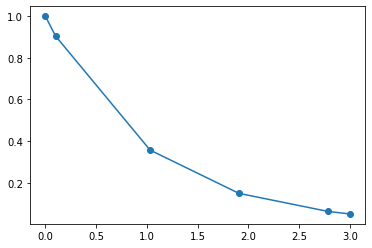

In [15]:
sol = solve_ivp(f, (tini, tfin), y0)
print(sol.y)

plt.plot(sol.t, sol.y[0], 'o-')

Pero ... ¿cómo se han seleccionado los puntos en los que se calcula la solución? El solver los ha calculado por nosotros. Si queremos tener control sobre estos puntos, podemos pasar de manera explícita el vector de tiempos:

In [16]:
time = np.linspace(tini, tfin, 300)

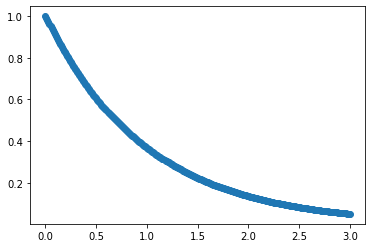

In [17]:
sol_2 = solve_ivp(f, (tini, tfin), y0, t_eval=time)

plt.plot(sol_2.t, sol_2.y[0, :], 'o-')

Procuremos graficar ambas soluciones anteriores, superpuestas:

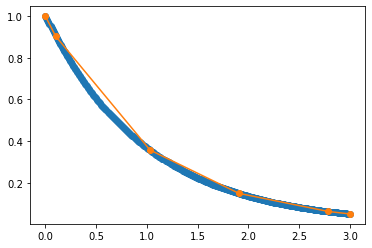

In [18]:
plt.plot(sol_2.t, sol_2.y[0, :], 'o-')
plt.plot(sol.t, sol.y[0, :], 'o-')

Podemos observar que a pesar de que en el primer resultado se han usado muchos menos puntos, aquellos en los que se ha calculado la solución coinciden con el segundo resultado. Esto se debe a que, en realidad, el solver siempre da los pasos que considere necesarios para calcular la solución, pero sólo guarda aquellos que nosotros le indicamos. Esto lo podemos comprobar como sigue:

In [16]:
print(f"function evaluations in sol 1: {sol.nfev}")
print(f"function evaluations in sol 2: {sol_2.nfev}")

function evaluations in sol 1: 32
function evaluations in sol 2: 32


De hecho podemos usar la salida *densa* para obtener la solución en un punto cualquiera:

In [17]:
sol_3 = solve_ivp(f, (tini, tfin), y0, dense_output=True)

In [18]:
sol_3.sol(1.14567)

array([0.31821077])

In [19]:
t = np.linspace(tini, tfin, 45)
y = sol_3.sol(t)

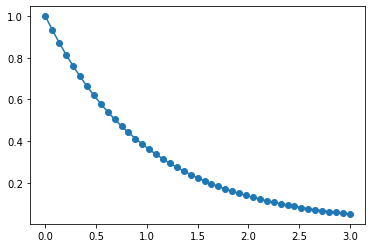

In [20]:
plt.plot(t, y[0, :], 'o-')

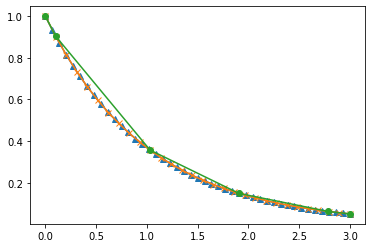

In [21]:
plt.plot(t, y[0, :], '^-')
plt.plot(sol_2.t, sol_2.y[0, :], 'x-')
plt.plot(sol.t, sol.y[0, :], 'o-')

### EDOs de orden superior

Tendremos que recordar ahora cómo reducir las ecuaciones de orden. De nuevo, vamos a probar con un ejemplo académico:

$$y + y'' = 0$$

$$\mathbf{y} \leftarrow \pmatrix{y \\ y'}$$

$$\mathbf{f}(\mathbf{y}) = \frac{d\mathbf{y}}{dt} =  \pmatrix{y \\ y'}' = \pmatrix{y' \\ y''} = \pmatrix{y' \\ -y}$$

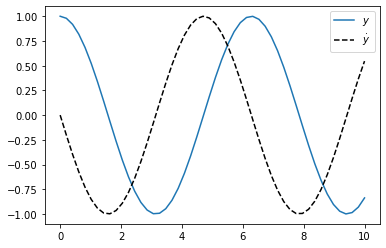

In [22]:
def f(t, y):
    return np.array([y[1], -y[0]])

t0 = 0
t1 = 10

t = np.linspace(t0, t1)
y0 = np.array([1.0, 0.0])

sol = solve_ivp(f, (t0, t1), y0, t_eval=t)

plt.plot(t, sol.y[0, :], label='$y$')
plt.plot(t, sol.y[1, :], '--k', label='$\dot{y}$')
plt.legend()

## Para ampliar

En el siguiente [cuaderno Curso AeroPython v1.0](http://nbviewer.ipython.org/github/AeroPython/Curso_AeroPython/blob/v1.0/Notebooks/Clase6b_Finale.ipynb) podemos ver una aplicación interesante referida al **salto de Felix Baumgartner**!!!

$$\displaystyle m \frac{d^2 y}{d t^2} = -m g + D$$

In [1]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../styles/aeropython.css'
HTML(open(css_file, "r").read())